# Develop Three Layer Artificial Neural Network for Pattern Data Set


In [1]:
import numpy as np

## Loss and Cost Functions

In [2]:
def loss(y, yhat):
    yloss = -1 * (((1-y) * np.log(1-yhat)) + (y * np.log(yhat)))
    return yloss   

def cost(Y, Yhat):
    Jcost = np.sum(loss(Y, Yhat))/Y.shape[0]
    return Jcost

## Activation Functions

In [3]:
def unit_activation(yhat):    
    return yhat
unit_activation = np.vectorize(unit_activation)

def sigmoid_activation(yhat):    
    return 1/(1+np.exp(-yhat))
sigmoid_activation = np.vectorize(sigmoid_activation)

def relu_activation(yhat):    
    return yhat * (yhat > 0)
relu_activation = np.vectorize(relu_activation)

def tanh_activation(yhat):
    return (np.exp(yhat)-np.exp(-yhat))/(np.exp(yhat)+np.exp(-yhat))
tanh_activation = np.vectorize(tanh_activation)

def tanh_derivative(tanh):
    return 1-np.square(tanh)
tanh_derivative = np.vectorize(tanh_derivative)

## Create Matrices for Train and Test Data

In [4]:
X = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[0:320,0:2].T 
Y = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[0:320,2:3].T 

Xt = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[320:400,0:2].T 
Yt = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[320:400,2:3].T 
Yb = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[:,2:3].T 
    
n = X.shape[0]
m = X.shape[1]
t = Xt.shape[1]

print("Number of Features: ", n)
print("Number of Training Examples: ", m)
print("Number of Test Examples: ", t)

Number of Features:  2
Number of Training Examples:  320
Number of Test Examples:  80


## Initialization and Running Forward Propagation 

In [5]:
#Iterations
h = 1000
alpha = 0.05

# Initialization of J and Yhat
J = np.zeros((1,h))
cost_sample = []

In [6]:
# IL0: Number of inputs to Layer 0
# NL0: Number of neurons in Layer 0
IL0 = n
NL0 = n
# The first layer is input layer so both number of inputs 
# and number of neurons are equal to number of features

# IL1: Number of inputs to Layer 1
# NL1: Number of neurons in Layer 1
IL1 = NL0
NL1 = 4
# As there are n neurons in the previous layer, the number
# of inputs to Layer 1 is equal to n. Number of neurons
# may be any. 

# IL2: Number of inputs to Layer 2
# NL2: Number of neurons in Layer 2
IL2 = NL1
NL2 = 1
# Number of inputs in Layer 2 equals to number of neurons in
# the previous layer (one input coming from each neuron). As 
# this is binary classification with a single output, the number 
# of neurons equals 1. 


# Layer 0 is input layer so W0 is identity matrix while B0 is zero matrix.
# Layer 0 in a way simply reproduces its inputs at the output
B0 = np.zeros((NL0, 1))
W0 = np.identity((NL0))

# Layer 1 is a passthrough layer. As number of inputs to the layer equals
# 2 and number of neurons are 4, the size of W1 will be 4 x2. To make this
# layer a passthrough layer, the 4 x 2 W1 matrix needs to consist of a 
# a 2 x 2 identity matrix and a 2 x 2 zero matrix. Also B1 is a zero matrix
B1 = np.zeros((NL1,1))
W1 = np.array([[1, 0],[0, 1],[0, 0],[0, 0]])


# Layer 2 is a simple Logistic Regression Unit. W2 and B2 are intialized as ones.
B2 = np.ones((NL2,1))
W2 = np.ones((NL2,IL2))

# We now runs a loop for performing forward- and backpropagation
for g in range(h):
    # Forward propagation 
    X0 = X
    G0 = np.matmul(W0,X0) + B0
    H0 = unit_activation(G0)
    X1 = H0
    G1 = np.matmul(W1,X1) + B1
    H1 = tanh_activation(G1)
    X2 = H1
    G2 = np.matmul(W2,X2) + B2
    H2 = sigmoid_activation(G2)
    Yhat = H2

    # Determine Cost
    J[0,g] = cost(Y, Yhat)/m
    if (g+1) % 100 == 0:
        cost_sample.append(J[0,g])
    
    # Backpropagation for layer 2
    dJdG2 = Yhat - Y
    dJdB2 =  np.sum(dJdG2, axis=1,keepdims=True)/m 
    dJdW2 = np.matmul(dJdG2, X2.T)/m
    B2 = B2 - alpha * dJdB2
    W2 = W2 - alpha * dJdW2
    
    # Backpropagation for layer 1
    dG1dW1 = np.multiply(np.matmul(W2.T, dJdG2), tanh_derivative(H1))
    dJdB1 = np.sum(dG1dW1)/m
    dJdW1 = np.matmul(dG1dW1, X1.T)/m
    B1 = B1 - alpha * dJdB1
    W1 = W1 - alpha * dJdW1

print("Training finished")

Training finished


## Plot the change in cost function against all 1000 iterations

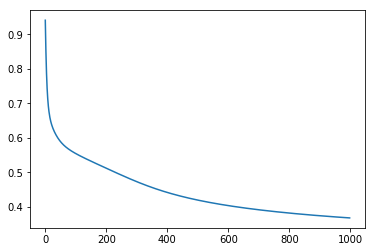

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(J[0, 0:h-1])
plt.show()

## Use the determined model parameters to predict the output for the test data

In [8]:
# We now run forward propagation using the Weights and Biases created by training

# Using the Testing data as input -- Xt
X0 = Xt
G0 = np.matmul(W0,X0) + B0
H0 = unit_activation(G0)
X1 = H0
G1 = np.matmul(W1,X1) + B1
H1 = tanh_activation(G1)
X2 = H1
G2 = np.matmul(W2,X2) + B2
H2 = sigmoid_activation(G2)
Yhat = H2

## Compare the predicted output and actual output for the test data and determine percent acccuracy

In [9]:

# Round the Yhat values to 1 or 0
Yt_hat = np.rint(Yhat)

# Compare the Yhat values to the Yt values for the test data
Yt_compare = np.equal(Yt, Yt_hat)

# Compute percent accuracy
Yt_accuracy = np.mean(Yt_compare)*100


## Print Out

In [10]:
# Print the cost sample
print("The cost_sample list is:\n", cost_sample)
print("\n")

# Print out the accuracy using the mean of True/False values
print("The accuracy is: {}%".format(Yt_accuracy))
print("\n")

# Print the model parameters
print("W1:\n", W1)
print("B1:\n", B1)
print("W2:\n", W2)
print("B2:\n", B2)
    

The cost_sample list is:
 [0.5546217217789945, 0.512046462964825, 0.4730618707030798, 0.4417617088901453, 0.4195251292743684, 0.4035082021866837, 0.3914011936360476, 0.38186108639530936, 0.37410667824934885, 0.36765582926211254]


The accuracy is: 80.0%


W1:
 [[ 1.25069304 -1.36991328]
 [ 0.02705851  1.79566111]
 [-0.82429883 -0.80958968]
 [-0.82429883 -0.80958968]]
B1:
 [[-0.01422029]
 [-0.01422029]
 [-0.01422029]
 [-0.01422029]]
W2:
 [[2.32248823 2.59015526 1.19082565 1.19082565]]
B2:
 [[-0.00581167]]
